# Decision Tree classifier algorithm on Fish dataset

**importing important libararies**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [4]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Fish.csv" with length 6022 bytes


In [8]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Label encoder**

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
df['Species']= le.fit_transform(df['Species'])

df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [20]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [34]:
x=df.drop(['Species'],axis=1)
x.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [35]:
y=df.Species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**Scaling**

In [36]:
scaler = preprocessing.StandardScaler()
df1 = scaler.fit_transform(x)

In [37]:
df2=pd.DataFrame(df1, columns =['Weight', 'Length1','Length2','Length3','Height','Width'])

In [38]:
df2.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


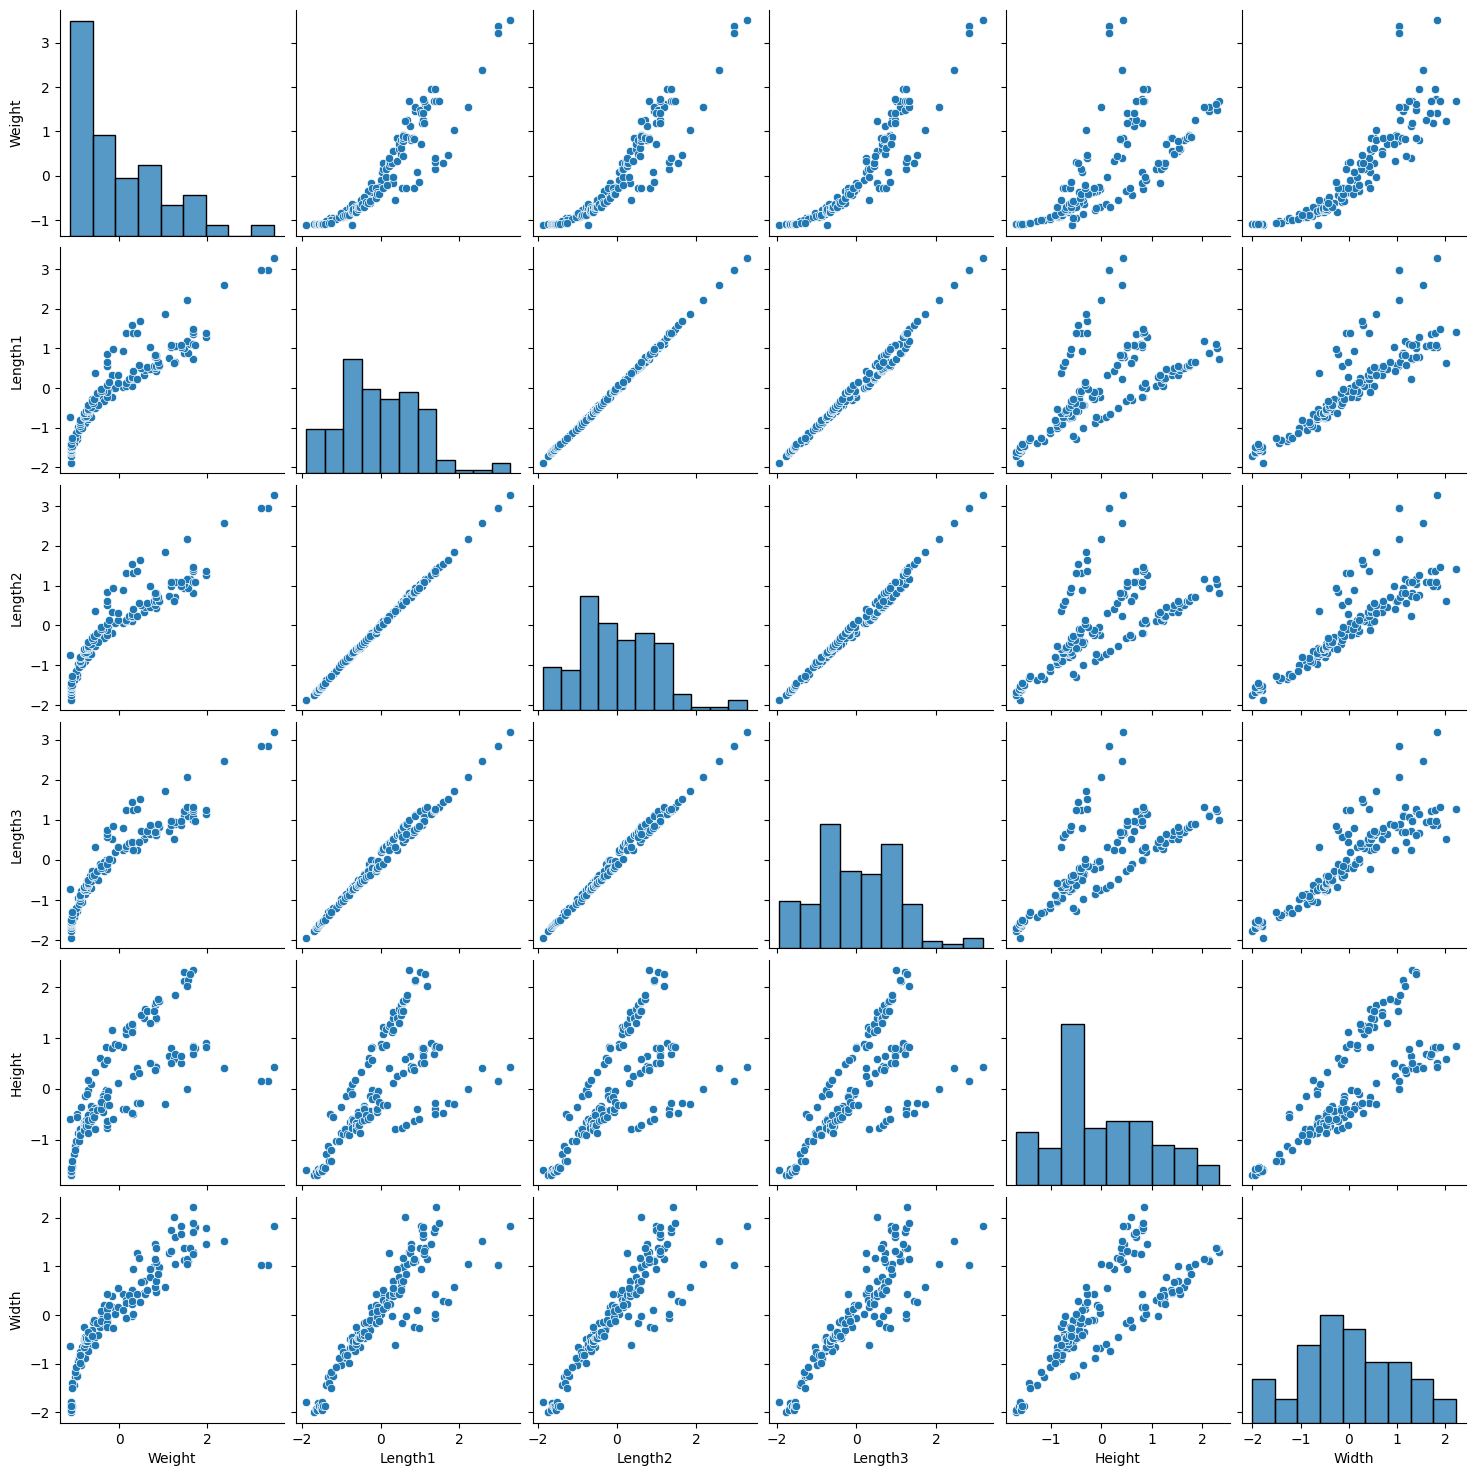

In [39]:
sns.pairplot(df2)

**test_train_split**

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**model building**

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
clf.score(x_test,y_test)

0.7547169811320755

In [45]:
clf.score(x_train,y_train)

1.0

**lets use random forest classifier also to reduce some amount of overfitting of model**

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf2= RandomForestClassifier(n_estimators=5)

In [55]:
clf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [56]:
clf2.score(x_test,y_test)

0.7924528301886793

In [57]:
clf2.score(x_train,y_train)

0.9528301886792453

In [58]:
yp=clf2.predict(x_test)


**Some Visualisation**

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, yp)

<Axes: >

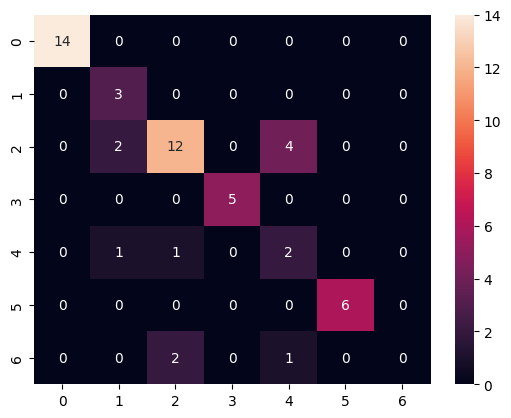

In [61]:
sns.heatmap(cm,annot=True)

<Axes: >

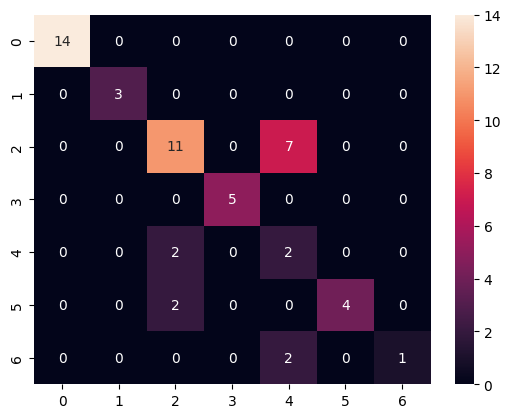

In [62]:
yp1=clf.predict(x_test)
cm2=confusion_matrix(y_test, yp1)
sns.heatmap(cm2,annot=True)

[Text(0.7115384615384616, 0.9583333333333334, 'x[4] <= 12.412\ngini = 0.784\nsamples = 106\nvalue = [21, 8, 38, 12, 16, 8, 3]'),
 Text(0.6153846153846154, 0.875, 'x[4] <= 3.23\ngini = 0.74\nsamples = 84\nvalue = [1, 8, 36, 12, 16, 8, 3]'),
 Text(0.5384615384615384, 0.7916666666666666, 'x[0] <= 7.3\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 1, 0, 0, 8, 0]'),
 Text(0.5, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(0.5769230769230769, 0.7083333333333334, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]'),
 Text(0.6923076923076923, 0.7916666666666666, 'x[1] <= 39.9\ngini = 0.698\nsamples = 75\nvalue = [1, 8, 35, 12, 16, 0, 3]'),
 Text(0.6538461538461539, 0.7083333333333334, 'x[1] <= 25.1\ngini = 0.658\nsamples = 68\nvalue = [1, 8, 35, 5, 16, 0, 3]'),
 Text(0.4230769230769231, 0.625, 'x[4] <= 6.569\ngini = 0.659\nsamples = 40\nvalue = [1, 8, 16, 0, 15, 0, 0]'),
 Text(0.3076923076923077, 0.5416666666666666, 'x[4] <= 6.139\ngini = 0.469\nsamples 

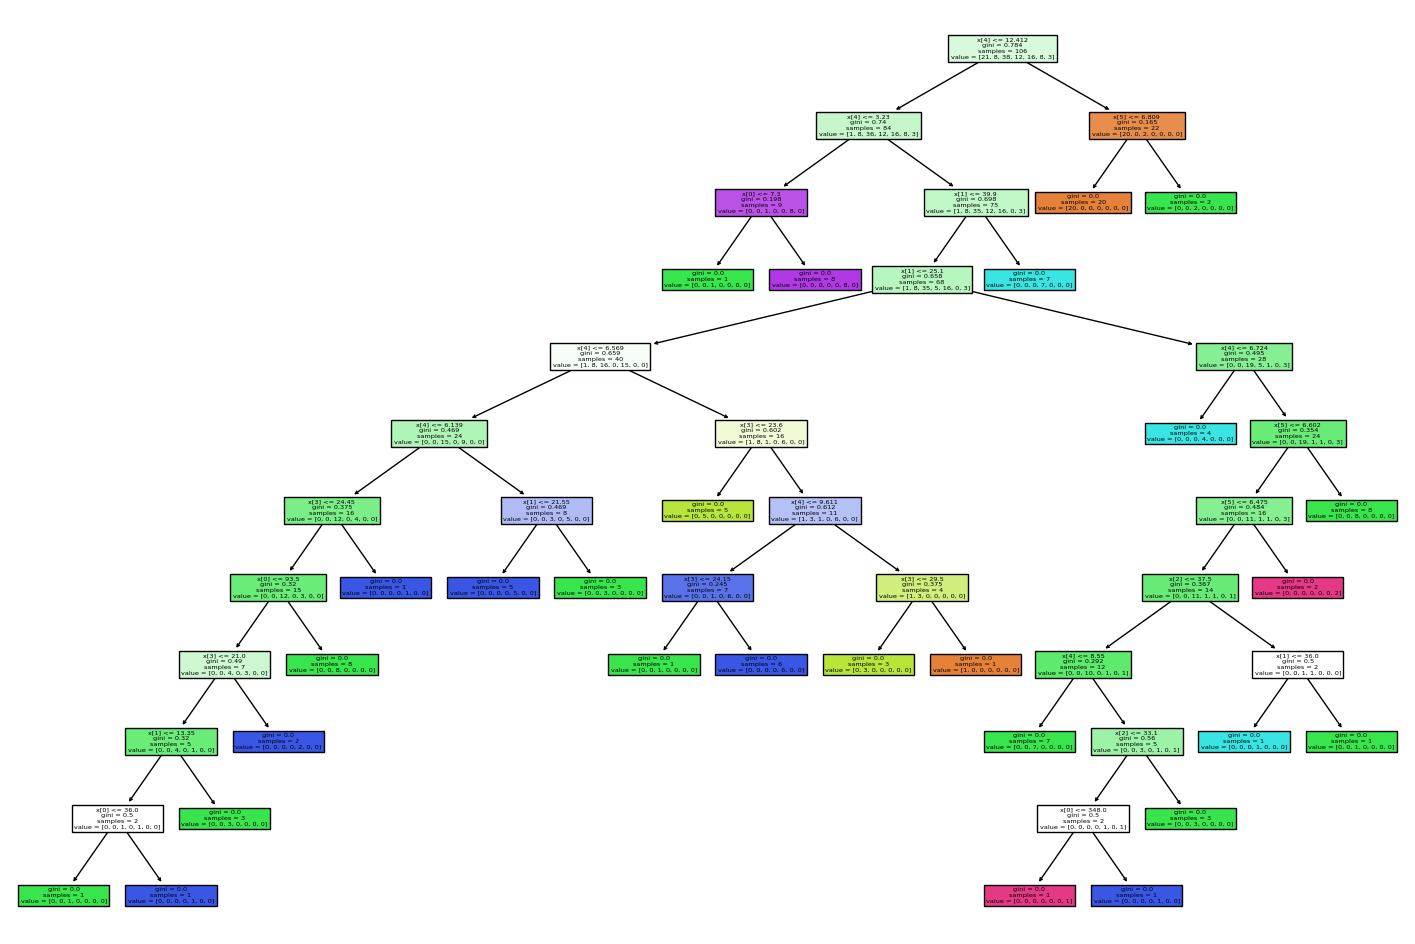

In [65]:
from sklearn import tree
plt.figure(figsize=(18,12))
tree.plot_tree(clf,filled=True)